<a href="https://colab.research.google.com/github/AntonySkibidi/automation_robotics_lab/blob/master/Kopia_notatnika_lab_auto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antoni Paprocki 252548, Oliwier Janowski 250180, Jędrzej Simiński 250192

**Lab 2: Advanced Linear Programming and Sensitivity Analysis**
- Defining more complex linear programming tasks
- Learning different constraint types
- Sensitivity analysis

**Production Optimization Problem**

This program solves a linear programming problem for optimizing production of three products (A, B, and C).

The A can be for example a number of beds, B can be meters of plywood and C can be meters of low quality plywood.
Notice that it does not make sense to produce a half of a bed, so we need to use integer variables for this decision variable.

**Decision Variables:**
- unitsA: Number of units of product A to produce (integer):
- unitsB: Number of units of product B to produce
- unitsC: Number of units of product C to produce

**Objective Function:**
- Maximize profit: 400 PLN per unit A + 300 PLN per unit B + 200 PLN per unit C

**Constraints:**
- Assembly time: 0.3h per A + 0.1h per B + 0.1h per C ≤ 1800 hours
- Quality control: 0.1h per A + 0.08h per B + 0.04h per C ≤ 800 hours
- Packaging: 0.06h per A + 0.04h per B + 0.05h per C ≤ 700 hours


In [ ]:
# In Google Colab, ensure PuLP is installed:
# !pip install pulp

!pip install pulp
from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD
)

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
# Let's say:
#   - A (number of units of product A) is integer (like beds).
#   - B (number of units of product B) is continuous or integer, depending on your scenario.
#   - C (number of units of product C) is continuous or integer, too.

A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
# Profit values (you can tweak these):
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints

# --- Resource / Time Constraints (same as the previous example, extended if desired) ---
# Example: max available hours in Assembly, Quality Control, and Packaging
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# --- Minimum Demand Constraints ---
# Suppose the company must produce at least 100 units of A, 50 of B, and 80 of C to satisfy orders.
prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# --- Optional Additional Constraints ---
# For instance, if product C requires a special component that is limited:
# Let's say we have only 500 units of that component, and each unit of C consumes 1 unit of that component
# prob += C <= 500, "Special_Component_Limit"

# Alternatively, we might have a ratio constraint, e.g., for product mix synergy:
# For example, we do not want to produce more B than 2 times A
# prob += B <= 2 * A, "Mix_Ratio_Constraint"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print results
print("Status:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.9 MB/s eta 0:00:00
Status: 1
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit =  3515783.3499999996


## 2. Interpreting the Extended Model



### Minimum Demand Constraints:
- E.g. `A >= 100` ensures at least 100 units of A are produced.

### Optional Constraints:
- Resource constraints, ratio constraints, or any other real-world limitations.



## 3. Performing Sensitivity Analysis

### Approach A: Manual Parameter Variation
- **Change the availability of resources:**
  - For example, reduce the 1800 hours of Assembly to 1500, solve again, and observe the new optimal solution.
- **Change the profit coefficients:**
  - If the profit for product C increases to 250, does the solution shift toward more C?
- **Change the minimum demand:**
  - If the market demands 150 units of A instead of 100, how does that affect the objective?

## Exercise 1: Minimum Demand and New Constraints

- Implement the code above and check if it finds a feasible solution.
- Alter the minimum demands:
  - Increase or decrease them to see if the solution changes drastically.
- Interpret which constraints become "binding" (fully used, the value of the constraint is equal to its limit) in the optimal solution.

In [ ]:
from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    value,
    PULP_CBC_CMD,
    LpStatus
)

def build_problem(
    assembly_hours=1800,
    qc_hours=800,
    packaging_hours=700,
    profit_A=400,
    profit_B=300,
    profit_C=200,
    min_A=100,
    min_B=50,
    min_C=80
):
    """
    Builds a production‐planning LP with:
      - resource limits: assembly_hours, qc_hours, packaging_hours
      - profit coefficients: profit_A, profit_B, profit_C
      - minimum demand: min_A, min_B, min_C
    """
    prob = LpProblem("Extended_Production_Problem", LpMaximize)

    # Decision variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)
    B = LpVariable("B", lowBound=0)
    C = LpVariable("C", lowBound=0)

    # Objective
    prob += profit_A * A + profit_B * B + profit_C * C, "Profit"

    # Resource constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= assembly_hours,     "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= qc_hours,          "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= packaging_hours,   "Packaging_Hours"

    # Minimum‐demand constraints
    prob += A >= min_A, "Min_Demand_A"
    prob += B >= min_B, "Min_Demand_B"
    prob += C >= min_C, "Min_Demand_C"

    return prob, (A, B, C)

def solve_and_report(label, prob, vars):
    prob.solve(PULP_CBC_CMD(msg=False))
    print(f"\n--- {label} ---")
    print("Status:", LpStatus[prob.status])
    if LpStatus[prob.status] != "Optimal":
        return
    for v in vars:
        print(f"{v.name:>5s} = {v.varValue}")
    print("Total profit =", value(prob.objective))
    print("Binding constraints:")
    for name, c in prob.constraints.items():
        used = value(c)
        limit = c.constant
        if abs(used - limit) < 1e-6:
            print(f"  {name}: used = {used:.2f}, limit = {limit:.2f}")

if __name__ == "__main__":
    # Base case
    base_prob, base_vars = build_problem()
    solve_and_report("Base Case", base_prob, base_vars)

    # 1) Reduce Assembly hours from 1800 → 1500
    prob1, vars1 = build_problem(assembly_hours=1500)
    solve_and_report("Reduced Assembly (1500 h)", prob1, vars1)

    # 2) Increase profit of C from 200 → 250
    prob2, vars2 = build_problem(profit_C=250)
    solve_and_report("Higher Profit C (250)", prob2, vars2)

    # 3) Increase minimum demand A from 100 → 150
    prob3, vars3 = build_problem(min_A=150)
    solve_and_report("Higher Min Demand A (150)", prob3, vars3)



--- Base Case ---
Status: Optimal
    A = 1894.0
    B = 2948.1667
    C = 9368.6667
Total profit = 3515783.3499999996
Binding constraints:

--- Reduced Assembly (1500 h) ---
Status: Optimal
    A = 100.0
    B = 5050.0
    C = 9650.0
Total profit = 3485000.0
Binding constraints:

--- Higher Profit C (250) ---
Status: Optimal
    A = 100.0
    B = 4891.6667
    C = 9966.6667
Total profit = 3999166.6849999996
Binding constraints:

--- Higher Min Demand A (150) ---
Status: Optimal
    A = 1894.0
    B = 2948.1667
    C = 9368.6667
Total profit = 3515783.3499999996
Binding constraints:


This code uses the PuLP library in Python to solve a linear programming (LP) model for production planning in a factory, aiming to maximize profit while considering limited resources (assembly, quality control, and packaging hours) and minimum demand for three products (A, B, and C).

The `build_problem` function sets up the LP model with adjustable parameters, defining decision variables for production levels and an objective function to maximize profit. Constraints ensure resource usage stays within limits and that minimum production levels are met.

The `solve_and_report` function outputs production levels, total profit, and binding constraints that indicate resource bottlenecks.

In the `__main__` block, the model evaluates four scenarios: the base case, reduced assembly hours, increased profit for product C, and raised minimum demand for product A, demonstrating sensitivity analysis in optimization.

## Exercise 2: Sensitivity Analysis on Resource Availability

- Create a loop that iterates over possible Assembly hours: 1600, 1800, 2000.
- For each iteration, solve the problem and record:
  - The optimal quantity of A, B, C.
  - The total profit.
- Plot or tabulate results to see the trend (if you like, e.g., in a DataFrame).

,AssemblyHours,A,B,C,Profit
0,1600,631.0,4316.4167,9789.6667,3505258.35
1,1800,1894.0,2948.1667,9368.6667,3515783.35
2,2000,3157.0,1579.9167,8947.6667,3526308.35


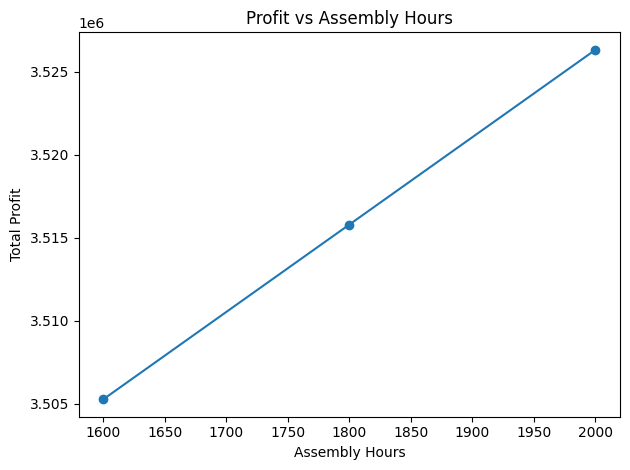

In [ ]:
!pip install pulp

import pulp as pl
import pandas as pd
import matplotlib.pyplot as plt

def solve_for_assembly(assembly_hours):
    # Build the problem
    prob = pl.LpProblem("ProfitMax", pl.LpMaximize)
    A = pl.LpVariable("A", lowBound=0, cat=pl.LpInteger)
    B = pl.LpVariable("B", lowBound=0)
    C = pl.LpVariable("C", lowBound=0)

    # Objective
    prob += 400*A + 300*B + 200*C

    # Resource constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= assembly_hours, "Assembly"
    prob += 0.1*A + 0.08*B + 0.04*C <= 800,          "QC"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700,          "Packaging"

    # Minimum demands
    prob += A >= 100, "MinA"
    prob += B >= 50,  "MinB"
    prob += C >= 80,  "MinC"

    prob.solve(pl.PULP_CBC_CMD(msg=False))

    return {
        'AssemblyHours': assembly_hours,
        'A': A.varValue,
        'B': B.varValue,
        'C': C.varValue,
        'Profit': pl.value(prob.objective)
    }

# Run sensitivity
hours = [1600, 1800, 2000]
data = [solve_for_assembly(h) for h in hours]

# Tabulate
df = pd.DataFrame(data)
display(df)

# Plot
plt.figure()
plt.plot(df['AssemblyHours'], df['Profit'], marker='o')
plt.xlabel('Assembly Hours')
plt.ylabel('Total Profit')
plt.title('Profit vs Assembly Hours')
plt.tight_layout()
plt.show()

The script uses the `pulp` library to create a linear programming model for maximizing profits from three products: A, B, and C. It defines a function that sets production variables, establishes a profit-maximizing objective, and adds resource constraints.

The function runs for assembly hour scenarios of 1600, 1800, and 2000, solving the model for each and gathering production quantities and profits. Results are presented in a table and a line plot shows how profit varies with assembly hours, helping in decisions on resource allocation.

## Exercise 3 (Optional): Binary Decision Constraints

- Add a binary variable that indicates whether you open a specific production line (1) or not (0).
- If that line is closed, the hours available might be reduced or zero.
- Solve and see how the solver decides the best strategy (to open or not to open).

# Bonus:
 - Add sliders to show the values of the variables and the constraints.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from pulp import *

def solve_optimization(profit_A_value=400):
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Define variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
    B = LpVariable("B", lowBound=0)  # continous meters of plywood
    C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

    # Profit
    profit_A = profit_A_value
    profit_B = 300
    profit_C = 200

    # Objective Function
    prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

    # Constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50,  "Min_Demand_B"
    prob += C >= 80,  "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

    # Results
    results = {
        "status": LpStatus[prob.status],
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "total_profit": value(prob.objective)
    }

    return results

    # Define slider
profit_A_slider = widgets.FloatSlider(
    value=400,
    min=0,
    max=800,
    step=10,
    description='Profit A',
    continuous_update=False
)
output = widgets.Output()
def update_results(change):
    with output:
        output.clear_output()
        results = solve_optimization(profit_A_slider.value)
        print(f"Status: {results['status']}")
        print(f"A = {results['A']}")
        print(f"B = {results['B']}")
        print(f"C = {results['C']}")
        print(f"Total profit = {results['total_profit']}")

profit_A_slider.observe(update_results, names='value')
display(profit_A_slider)
display(output)
update_results(None)

FloatSlider(value=400.0, continuous_update=False, description='Profit A', max=800.0, step=10.0)

Output()

The program helps you maximize profit by deciding how much of three products (A, B, and C) to produce. You can only produce whole units of product A, while B and C can be fractional.

You can adjust the profit for product A using a slider labeled "Profit A," which ranges from 0 to 800. As you move the slider, the program updates the optimization calculations in real time.

Results below the slider show:
-Solution status
-Quantity of A, B, and C to produce
-Total profit

This tool lets you see how changes in product A's profit affect production decisions.